<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/CNN_Examples/LeNet_MNIST_PyTorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement the LeNet for classification of MNIST data using PyTorch

In this code, we first define the LeNet architecture as a PyTorch `nn.Module`. We then load the MNIST dataset and apply transformations, and create data loaders for the train and test sets.

Next, we create an instance of the model, show the model summary using the `summary()` method from the `torchsummary` package, and define the loss function and optimizer.

We then train the model for a specified number of epochs, compute the test set loss and accuracy, and display a few sample plots of the test results using Matplotlib.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Normalize
import matplotlib.pyplot as plt
from torchsummary import summary

In [2]:
# Define the LeNet model architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.avgpool2(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

In [3]:
# Load the MNIST dataset and apply transformations
train_set = MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_set = MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Define the data loaders
batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create an instance of the model
model = LeNet()

# Show the model summary
summary(model, input_size=(1, 28, 28))

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         AvgPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         AvgPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 120]          30,840
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


In [4]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        _, preds = torch.max(output, 1)
        train_acc += torch.sum(preds == target.data)
    train_loss = train_loss / len(train_loader.dataset)
    train_acc = train_acc / len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.6f}'.format(epoch+1, train_loss, train_acc))

Epoch: 1 	Training Loss: 0.522288 	Training Accuracy: 0.840517
Epoch: 2 	Training Loss: 0.160096 	Training Accuracy: 0.951017
Epoch: 3 	Training Loss: 0.104171 	Training Accuracy: 0.968217
Epoch: 4 	Training Loss: 0.082031 	Training Accuracy: 0.974667
Epoch: 5 	Training Loss: 0.068679 	Training Accuracy: 0.978900
Epoch: 6 	Training Loss: 0.058113 	Training Accuracy: 0.981733
Epoch: 7 	Training Loss: 0.050514 	Training Accuracy: 0.984283
Epoch: 8 	Training Loss: 0.046041 	Training Accuracy: 0.985350
Epoch: 9 	Training Loss: 0.039821 	Training Accuracy: 0.987467
Epoch: 10 	Training Loss: 0.035588 	Training Accuracy: 0.988450


In [5]:
# Evaluate the model on the test set
test_loss = 0.0
test_acc = 0.0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item() * data.size(0)
        _, preds = torch.max(output, 1)
        test_acc += torch.sum(preds == target.data)

In [6]:
#Compute the test set loss and accuracy
test_loss = test_loss / len(test_loader.dataset)
test_acc = test_acc / len(test_loader.dataset)
print('Test Loss: {:.6f} \tTest Accuracy: {:.6f}'.format(test_loss, test_acc))

Test Loss: 0.042298 	Test Accuracy: 0.985900


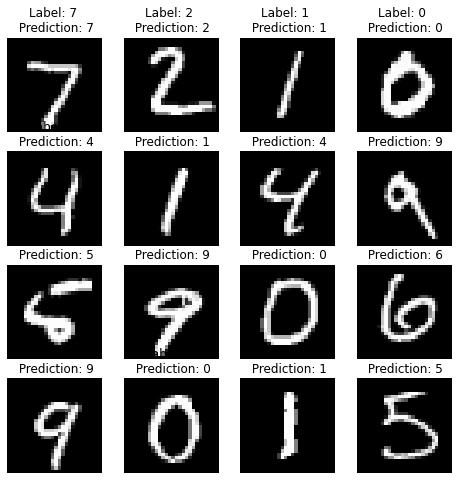

In [10]:
#Display a few sample plots of the test results

fig = plt.figure(figsize=(8, 8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(test_set[i][0].squeeze(), cmap='gray')
  plt.title('Label: {} \n Prediction: {}'.format(test_set[i][1], torch.argmax(model(test_set[i][0].unsqueeze(0)))))
  plt.axis('off')

plt.show()